<a href="https://colab.research.google.com/github/dwaipayan-code/breast-cancer-classification/blob/main/breast_cancer_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
breast_cancer_dataset=sklearn.datasets.load_breast_cancer()


In [ ]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
df=pd.DataFrame(breast_cancer_dataset.data,columns=breast_cancer_dataset.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['label']=breast_cancer_dataset.target
df.tail()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df['label'].value_counts()

,count
label,
1,357
0,212


In [ ]:
# 0 refers to bening
# 1 refers to malignant

In [ ]:
x=df.drop(columns=['label'],axis=1)
y=df['label']

In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled_train = scaler.fit_transform(x_train)

In [ ]:
import tensorflow as tf
tf.random.set_seed(28)
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    layers.Flatten(input_shape=(30,)),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(16, activation='relu'),

    layers.Dense(2, activation='softmax')  # Using softmax for multi-class output (malignant/benign)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(x_scaled_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6348 - loss: 0.7025 - val_accuracy: 0.9130 - val_loss: 0.5319
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7992 - loss: 0.4644 - val_accuracy: 0.9783 - val_loss: 0.4084
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8682 - loss: 0.3331 - val_accuracy: 0.9783 - val_loss: 0.3130
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9110 - loss: 0.2436 - val_accuracy: 0.9565 - val_loss: 0.2462
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9186 - loss: 0.2425 - val_accuracy: 0.9565 - val_loss: 0.2049
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9289 - loss: 0.1925 - val_accuracy: 0.9565 - val_loss: 0.1769
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9200 - loss: 0.2109 - val_accuracy: 0.9348 - val_loss: 0.1561
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9382 - loss: 0.1769 - val_accuracy: 0.9565 - val_loss

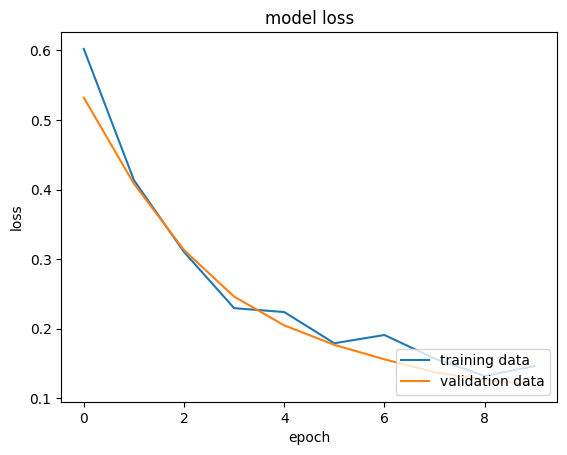

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data','validation data'],loc ='lower right')


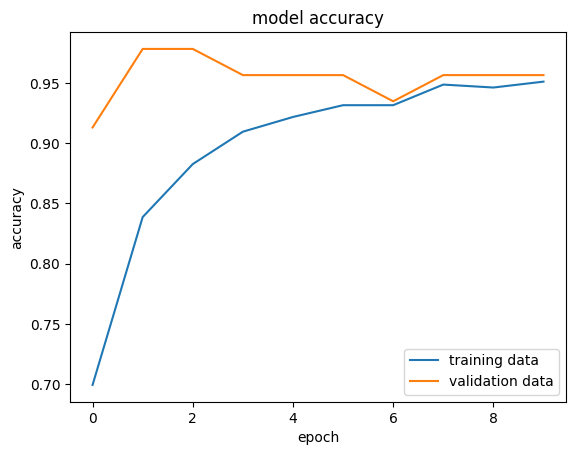

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data','validation data'],loc ='lower right')

In [ ]:
#loss,accuracy= model.evaluate(x_scaled_test = scaler.fit_transform(x_test),y_test)
x_scaled_test = scaler.fit_transform(x_test)

In [ ]:
loss,accuracy= model.evaluate(x_scaled_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9641 - loss: 0.1296 


In [ ]:
print(x_scaled_test.shape)

(114, 30)


In [ ]:
print(x_scaled_test[0])

[-0.08700339 -1.47192915 -0.10537391 -0.21479674  2.05627941 -0.18759821
  0.04345969  0.3431473   0.48693221  0.20971492  0.41483725  2.38110688
  0.53816721  0.01895993  0.95128447  0.31678369  0.28189043  2.21465008
 -0.39276605  0.44485916 -0.3863489  -1.69650664 -0.42190004 -0.44557481
  0.23041821 -0.75521902 -0.60192371 -0.26629174 -1.09776353 -0.65597459]


In [ ]:
y_pred=model.predict(x_scaled_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [ ]:
print(y_pred[0]
)

[0.08380661 0.91619337]


In [ ]:
print(x_scaled_test)

[[-0.08700339 -1.47192915 -0.10537391 ... -0.26629174 -1.09776353
  -0.65597459]
 [ 0.19989092  0.03577342  0.1706179  ...  0.44844054  0.06066588
   0.02108157]
 [-1.28858427 -0.21847659 -1.30667757 ... -1.41981535  0.19788632
  -0.31050377]
 ...
 [ 0.67523542  0.61546345  0.70329853 ...  1.36221218  1.000987
   0.62759948]
 [ 0.20832899  1.5866985   0.10942329 ... -1.35965118 -1.95719681
  -1.62740299]
 [ 0.78774299  0.03068842  0.84293725 ...  2.03773974  0.27299646
   0.34822356]]


In [ ]:
print(y_pred)

[[0.08380661 0.91619337]
 [0.12705627 0.8729437 ]
 [0.00799285 0.99200714]
 [0.99792784 0.00207208]
 [0.20257473 0.79742527]
 [0.9589391  0.04106086]
 [0.04838637 0.9516136 ]
 [0.00841587 0.991584  ]
 [0.01470242 0.9852976 ]
 [0.02990517 0.97009486]
 [0.13454291 0.8654571 ]
 [0.04542018 0.95457983]
 [0.03730216 0.9626979 ]
 [0.0300194  0.96998066]
 [0.01252875 0.9874712 ]
 [0.94245696 0.05754296]
 [0.01400881 0.98599124]
 [0.01973254 0.9802674 ]
 [0.00985942 0.9901406 ]
 [0.9718612  0.02813886]
 [0.05848088 0.94151914]
 [0.01452543 0.9854745 ]
 [0.01092987 0.98907006]
 [0.018465   0.98153496]
 [0.06304183 0.9369582 ]
 [0.95342594 0.04657397]
 [0.02729949 0.97270054]
 [0.10102151 0.89897835]
 [0.93625665 0.06374336]
 [0.94641435 0.05358566]
 [0.05140197 0.9485979 ]
 [0.01587724 0.9841227 ]
 [0.02630471 0.9736953 ]
 [0.99468565 0.00531437]
 [0.9775186  0.02248124]
 [0.02747826 0.9725217 ]
 [0.00483558 0.99516433]
 [0.0245861  0.97541386]
 [0.01593467 0.98406523]
 [0.03117536 0.9688247 ]


In [ ]:
y_pred_labels=[np.argmax(i) for i in y_pred]

In [ ]:
print(y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


**Building the model prediction system
**

In [ ]:
#Taking the input data for one case(i.e. All the microscopic lab findings)
#input_data =()
input_data=(17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189
)


#change input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are preducting for one data point
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data=scaler.transform(input_data_reshaped)

prediction=model.predict(std_data)

print(prediction)

prediction_labels=[np.argmax(prediction)]
print(prediction_labels)

if(prediction_labels[0]==0):
    print('The breast cancer is Malignant')
else:
    print('The breast cancer is Bening')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.987392   0.01260797]]
[0]
The breast cancer is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
